In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scorecardpy as sc

In [2]:
# Load the dataset (replace 'path_to_your_data.csv' with your actual file path)
df = pd.read_csv('C:/Users/elbet/OneDrive/Desktop/Ten/week-6/github-notebook/Credit-Scoring-Model-/data/data/processed_data.csv')

## Constructing a Default Estimator

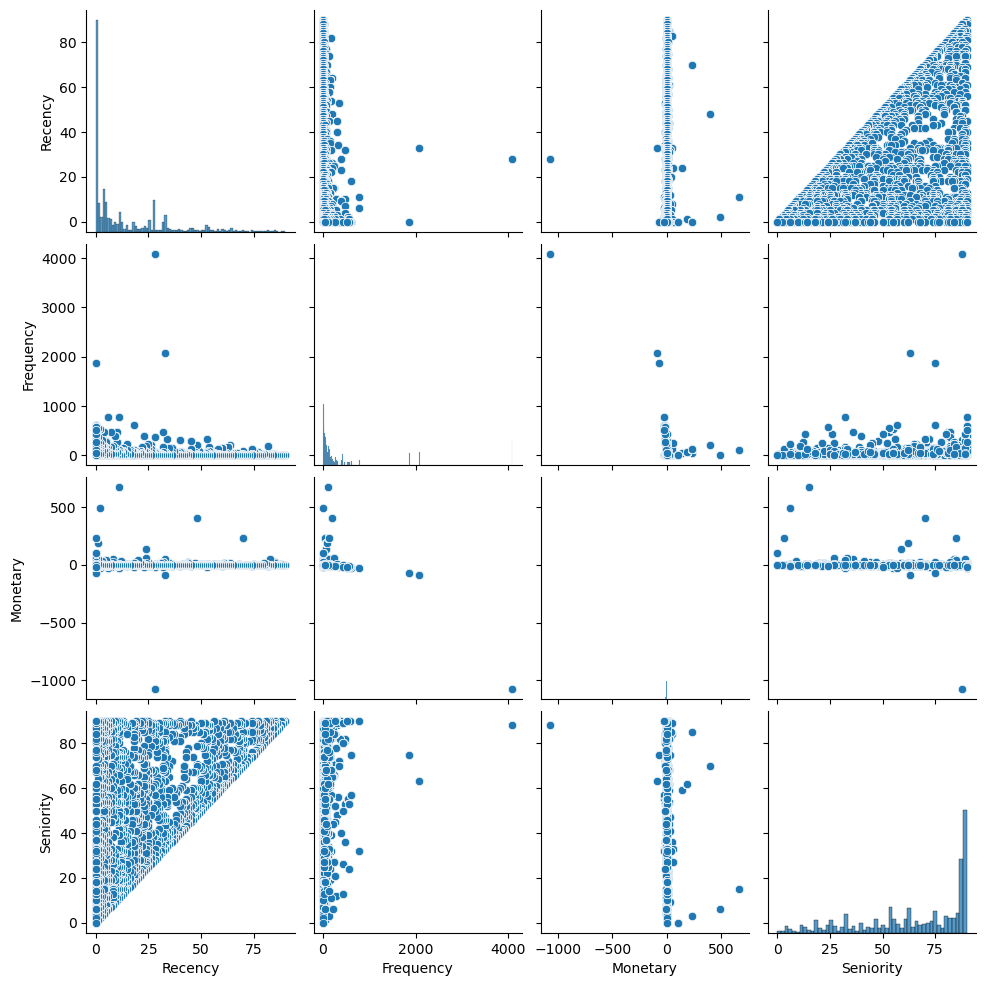

In [3]:
# 1. Constructing a Default Estimator using RFMS formalism
# Convert 'TransactionStartTime' to datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'], errors='coerce')

# Create RFMS features
# Recency: Days since the last transaction
df['Recency'] = (df['TransactionStartTime'].max() - df.groupby('CustomerId')['TransactionStartTime'].transform('max')).dt.days

# Frequency: Total number of transactions per customer
df['Frequency'] = df.groupby('CustomerId')['TransactionId'].transform('count')

# Monetary: Total transaction amount per customer
df['Monetary'] = df.groupby('CustomerId')['Amount'].transform('sum')

# Seniority: Days since the first transaction (engagement duration)
df['Seniority'] = (df['TransactionStartTime'].max() - df.groupby('CustomerId')['TransactionStartTime'].transform('min')).dt.days

# Visualize the RFMS features in pair plots to check distribution
sns.pairplot(df[['Recency', 'Frequency', 'Monetary', 'Seniority']])
plt.show()

## Assigning labels

In [4]:

# Assign Good/Bad Labels Based on RFMS Score


# Calculate RFMS score by multiplying features (adjust the logic based on your understanding)
df['RFMS_Score'] = df['Recency'] * df['Frequency'] * df['Monetary'] * df['Seniority']

# Define a threshold to classify users as 'good' or 'bad'
# Adjust the threshold based on your RFMS analysis (visualize to understand the distribution first)
threshold = df['RFMS_Score'].quantile(0.5)  # You can adjust this threshold
df['RiskLabel'] = df['RFMS_Score'].apply(lambda x: 'bad' if x < threshold else 'good')

# Check the distribution of good and bad users
display(df['RiskLabel'].value_counts())

RiskLabel
good    47853
bad     47809
Name: count, dtype: int64

## WoE Binning

In [5]:
# 2. Perform WoE Binning

# Perform WoE binning for RFMS features
features_to_bin = ['Recency', 'Frequency', 'Monetary', 'Seniority']

# WoE binning for RFMS features based on 'RiskLabel'
bins = sc.woebin(df, y='RiskLabel', x=features_to_bin)

# Apply WoE binning to the dataset
df_woe = sc.woebin_ply(df, bins)

# View the transformed dataset with WoE features
display(df_woe.head())

[INFO] creating woe binning ...


c:\Users\elbet\miniconda3\envs\elbetel\lib\site-packages\scorecardpy\condition_fun.py:141: UserWarning: The positive value in "RiskLabel" was replaced by 1 and negative value by 0.
  warnings.warn("The positive value in \"{}\" was replaced by 1 and negative value by 0.".format(y))
c:\Users\elbet\miniconda3\envs\elbetel\lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
c:\Users\elbet\miniconda3\envs\elbetel\lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='i

[INFO] converting into woe values ...


,TransactionMonth,ProductId,TransactionHour,RFMS_Score,FraudResult,TransactionCount,AccountId,TransactionId,CountryCode,ProductCategory_woe,...,CurrencyCode,TransactionDay,TransactionYear,SubscriptionId,CustomerId,TotalTransactionAmount,Frequency_woe,Monetary_woe,Recency_woe,Seniority_woe
0,11,ProductId_10,2,-0.000000,0,119,AccountId_3957,TransactionId_76871,256,-1.690824,...,UGX,15,2018,SubscriptionId_887,CustomerId_4406,0.170118,0.350225,0.610597,-1.762156,0.440422
1,11,ProductId_6,2,-0.000000,0,119,AccountId_4841,TransactionId_73770,256,0.607033,...,UGX,15,2018,SubscriptionId_3829,CustomerId_4406,0.170118,0.350225,0.610597,-1.762156,0.440422
2,11,ProductId_1,2,-1470.424614,0,2,AccountId_4229,TransactionId_26203,256,-1.690824,...,UGX,15,2018,SubscriptionId_222,CustomerId_4683,0.165122,-1.487822,-1.548223,1.065608,0.440422
3,11,ProductId_21,3,-3682.066811,0,38,AccountId_648,TransactionId_380,256,0.607033,...,UGX,15,2018,SubscriptionId_2185,CustomerId_988,0.175567,-0.535832,-1.548223,0.608133,0.440422
4,11,ProductId_6,3,-3682.066811,0,38,AccountId_4841,TransactionId_28195,256,0.607033,...,UGX,15,2018,SubscriptionId_3829,CustomerId_988,0.175567,-0.535832,-1.548223,0.608133,0.440422


In [6]:
# 3. Check Information Value (IV)

# Create a DataFrame to store IV values for each feature
iv_df = pd.DataFrame({k: v['total_iv'].iloc[0] for k, v in bins.items()}, index=['IV']).T

# Print IV values for each feature
print("IV values")
display(iv_df)

IV values


,IV
Recency,1.256831
Frequency,0.549286
Monetary,0.990679
Seniority,0.748898


In [7]:
# 4. Save the transformed dataset (optional)

df_woe.to_csv('C:/Users/elbet/OneDrive/Desktop/Ten/week-6/github-notebook/Credit-Scoring-Model-/data/data/df_woe.csv', index=False)

In [8]:
df_woe.head()

,TransactionMonth,ProductId,TransactionHour,RFMS_Score,FraudResult,TransactionCount,AccountId,TransactionId,CountryCode,ProductCategory_woe,...,CurrencyCode,TransactionDay,TransactionYear,SubscriptionId,CustomerId,TotalTransactionAmount,Frequency_woe,Monetary_woe,Recency_woe,Seniority_woe
0,11,ProductId_10,2,-0.000000,0,119,AccountId_3957,TransactionId_76871,256,-1.690824,...,UGX,15,2018,SubscriptionId_887,CustomerId_4406,0.170118,0.350225,0.610597,-1.762156,0.440422
1,11,ProductId_6,2,-0.000000,0,119,AccountId_4841,TransactionId_73770,256,0.607033,...,UGX,15,2018,SubscriptionId_3829,CustomerId_4406,0.170118,0.350225,0.610597,-1.762156,0.440422
2,11,ProductId_1,2,-1470.424614,0,2,AccountId_4229,TransactionId_26203,256,-1.690824,...,UGX,15,2018,SubscriptionId_222,CustomerId_4683,0.165122,-1.487822,-1.548223,1.065608,0.440422
3,11,ProductId_21,3,-3682.066811,0,38,AccountId_648,TransactionId_380,256,0.607033,...,UGX,15,2018,SubscriptionId_2185,CustomerId_988,0.175567,-0.535832,-1.548223,0.608133,0.440422
4,11,ProductId_6,3,-3682.066811,0,38,AccountId_4841,TransactionId_28195,256,0.607033,...,UGX,15,2018,SubscriptionId_3829,CustomerId_988,0.175567,-0.535832,-1.548223,0.608133,0.440422
